In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import requests
import pandas as pd

# merged_df = pd.DataFrame()

# Define indicators
gdp_indicator = "NY.GDP.MKTP.KD.ZG"  # GDP Growth (%)
unemployment_indicator = "SL.UEM.TOTL.ZS"  # Unemployment Rate (%)
inflation_indicator = "FP.CPI.TOTL.ZG"  # Inflation Rate (%)
fdi_indicator = "BX.KLT.DINV.WD.GD.ZS" # FDI Amount ($)

years = list(range(2000, 2023))

# Function that gets all data from World Bank API
def fetch_data(indicator):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={years[0]}:{years[-1]}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()

    return pd.DataFrame([
        {"Country": entry["country"]["value"],
         "Code": entry["country"]["id"],
         "Year": entry["date"],
         "Value": entry["value"]}
        for entry in data[1]
    ]) if isinstance(data, list) and len(data) > 1 else pd.DataFrame()

# Get data for each indicator
gdp_df = fetch_data(gdp_indicator).rename(columns={"Value": "GDP Growth (%)"})
unemployment_df = fetch_data(unemployment_indicator).rename(columns={"Value": "Unemployment Rate (%)"})
inflation_df = fetch_data(inflation_indicator).rename(columns={"Value": "Inflation Rate (%)"})
fdi_df = fetch_data(fdi_indicator).rename(columns={"Value": "Foreign Direct Investment"})


 # Merge all the coloumns
merged_df = gdp_df.merge(unemployment_df, on=["Country","Code", "Year"], how="outer")
merged_df = merged_df.merge(inflation_df, on=["Country", "Code", "Year"], how="outer")
merged_df = merged_df.merge(fdi_df, on=["Country", "Code","Year"], how="outer")


# Save to CSV
# merged_df.to_csv("foundationsOfDataScienceProject.csv")

merged_df[: 70]

,Country,Code,Year,GDP Growth (%),Unemployment Rate (%),Inflation Rate (%),Foreign Direct Investment
0,Africa Eastern and Southern,ZH,2000,3.214946,7.788317,8.601485,1.494282
1,Africa Eastern and Southern,ZH,2001,3.505726,7.676955,5.840354,4.850309
2,Africa Eastern and Southern,ZH,2002,3.836078,7.632330,8.763754,2.274342
3,Africa Eastern and Southern,ZH,2003,2.956241,7.586883,7.449700,2.251382
4,Africa Eastern and Southern,ZH,2004,5.555397,7.395648,5.023421,1.597595
...,...,...,...,...,...,...,...
65,Arab World,1A,2019,1.583715,10.216098,1.091848,1.327459
66,Arab World,1A,2020,-4.711784,11.325613,1.612222,1.207125
67,Arab World,1A,2021,4.031106,10.889659,2.965810,2.218885
68,Arab World,1A,2022,5.721433,9.953571,5.087542,2.235795


<Figure size 1000x600 with 0 Axes>

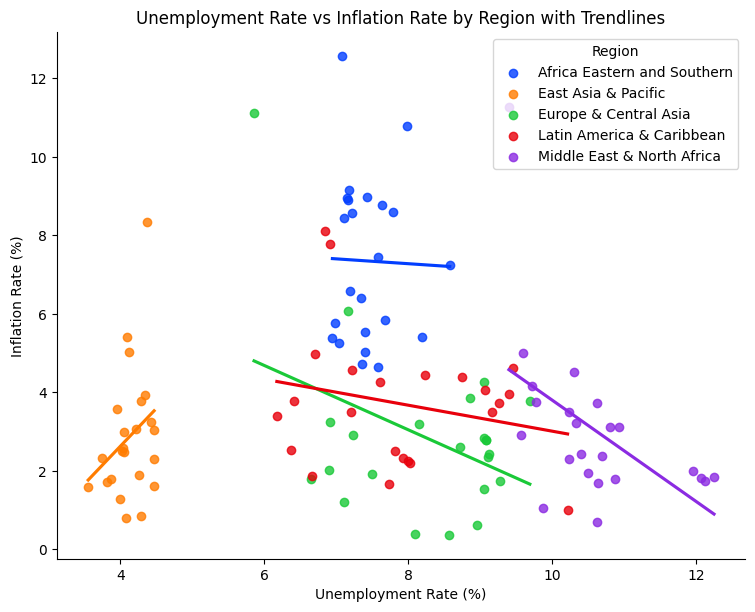

In [4]:
# Creating a new df with only data for regions in code list:
# all we need is the region name, unemployment rate, and inflation rate.

countries = ["Africa Eastern and Southern", "Latin America & Caribbean",
             "Europe & Central Asia", "Middle East & North Africa",
             "East Asia & Pacific"]

country_data = merged_df[merged_df['Country'].isin(countries)][['Country',
                                                        'Unemployment Rate (%)',
                                                        'Inflation Rate (%)']]

# Scatter plot of unemployment rate (x) vs inflation (y), countries color coded
# Trendlines / Regression lines added using sns.lmplot()

plt.figure(figsize=(10, 6))
scatter = sns.lmplot(data=country_data,
                     x="Unemployment Rate (%)",
                     y="Inflation Rate (%)",
                     hue="Country",
                     palette="bright",
                     ci=None,
                     aspect=1.3,
                     height=6)

# Set axis titles, remove the original legend and add our own
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment Rate vs Inflation Rate by Region with Trendlines")
scatter._legend.remove()
plt.legend(title="Region", loc='upper right')

plt.show()

# Graph #3 Explanation


In the 50s and 60s, British economist [A.W. Phillips](https://www.economicshelp.org/blog/1364/economics/phillips-curve-explained/) noticed an inverse relationship of exponential decay between unemployment rate and inflation rate. Namely, those in power could either prioritize inflation which would lead to more unemployment, or they could strive to decrease the unemployment rate which would lead to higher inflation.
This model is called the "Phillips Curve", and many economists have since argued that it's too simplistic and the two variables have no correlation. Regardless, we can still apply a regression model and look for this inward curve in our data:

This graph is a little chaotic, but we can see the differences where regions tend to occupy a certain section of the map. As we can see, most regions roughly mirror the Phillips Curve trend. The one exception is the data for 'East Asia and Pacific', which shows a slight positive correlation.